In [1]:
# Modules

# Load module to create Panda DataFrames in Jupyter Notebooks
import pandas as pd
# Load module to create and format various plots
import matplotlib.pyplot as plt
# Load module to handle high-level math functions and basic algebra
import numpy as np
# Load module to allow communication with HTTPS for API requests
import requests
# Load module that deserializes java script open notation into Jupyter Notebooks
import json
# Load module that returns the number of seconds passed since epoch 
import time
# Load module that contains probability distributions and statistical functions
from scipy.stats import linregress

In [2]:
# Fertility CSV:

# Define variable name that holds csv file location of the fertility rates
fertility_csv = "csv_files/Age-specific fertility rates, Total fertility and .csv"
# Define variable name the holds the read information from the csv file
fertility_csv_dataframe = pd.read_csv(fertility_csv)
# Print to screen in Pandas DataFrame the read csv information
fertility_csv_dataframe.head()

,"United Nations, Department of Economic and Social Affairs",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,"Population Division, Fertility and Family Plan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World Fertility Data 2012\nAGE-SPECIFIC FERTIL...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country,ISO code,Period,Reference,NaN,Total fertility,Age-specific fertility rates,NaN,NaN,NaN,...,NaN,NaN,Mean age at childbearing,Source type,Source,Survey name,Note on country or population,Note on age,Note on methods,Note on population data used in denominator
3,NaN,NaN,NaN,Year,Period,NaN,15-19,20-24,25-29,30-34,...,40-44,45-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,4,Around 1970,1973,1972-1973,8.21,168,359,355,307,...,137,81,30,Survey,National statistics,Afghanistan 1972-1974 National Demographic and...,NaN,NaN,NaN,NaN


In [3]:
# Clean:

# Define variable name that holds drop column information
fertility_clean = fertility_csv_dataframe.drop([0, 1])
# Use pandas column rename function (.columns) to rename the columns in the dataframe
fertility_clean.columns= ['Country', 'ISO Code', 'Period', 'Reference Year', 'Period', 'Total Fertility',
                          'Age-specific fertility rates: 15-19','Age-specific fertility rates: 20-24',
                          'Age-specific fertility rates: 25-29', 'Age-specific fertility rates: 30-34',
                         'Age-specific fertility rates: 35-39','Age-specific fertility rates: 40-44',
                          'Age-specific fertility rates: 45-49', 'Mean Age at Childbearing', 'D1', 'D2', 'D3','D4','D5','D6','D7']
# Drop additional columns from the already cleaned variable
fertility_clean = fertility_clean.drop(columns=['Period','D1','D2','D3','D4','D5','D6','D7'])
fertility_clean = fertility_clean.drop([2, 3])

#reference_years =sorted(fertility_clean['Reference Year'].unique())
#reference_years=fertility_clean["Reference Year"].unique()
#reference_years

# Print to screen the cleaned data variable 'fertility_clean'
fertility_clean

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,..,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,..,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1072,Zimbabwe,716,1969,6.74,79,272,304,257,218,145,73,31.2
1073,Zimbabwe,716,1987,5.42,102,251,250,212,158,80,32,29.5
1074,Zimbabwe,716,1998,3.98,112,199,180,135,108,46,15,28.3
1075,Zimbabwe,716,2004,3.8,99,205,172,144,86,42,13,28.1


In [4]:
# Sort:

# Define variable the holds the sort function of 'Reference Year' from most rescent
last_year=fertility_clean.sort_values('Reference Year', ascending=False).drop_duplicates(['ISO Code'])

reference_years =last_year['Reference Year'].unique()
#reference_years=fertility_clean["Reference Year"].unique()
reference_years

array(['2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1977'], dtype=object)

In [5]:
# Literacy CSV:

# Define variable name that holds the csv file location of the literacy rates
file_literacy = "csv_files/Our World In Data literacy-rate-by-country.csv"
# Define variable name that holds the read information from the csv
literacy_df = pd.read_csv(file_literacy)
# Print to screen, in Pandas DataFrame, the read csv information
literacy_df.head(10)

,Entity,Code,Year,Literacy rate (CIA Factbook (2016))
0,Afghanistan,AFG,2000,28.1
1,Albania,ALB,2011,96.8
2,Algeria,DZA,2006,72.6
3,American Samoa,ASM,1980,97.0
4,Andorra,AND,2011,100.0
5,Angola,AGO,2011,70.4
6,Anguilla,AIA,1984,95.0
7,Antigua and Barbuda,ATG,2011,99.0
8,Argentina,ARG,2011,97.9
9,Armenia,ARM,2011,99.6


In [6]:
# Change Name:

# change field name in literacy rate to literacy_rate
literacy_df.columns = ["Country", "Code", "Reference Year", "Literacy Rate"]
literacy_df['Reference Year']=literacy_df['Reference Year'].astype(str)
literacy_df.head(10)

,Country,Code,Reference Year,Literacy Rate
0,Afghanistan,AFG,2000,28.1
1,Albania,ALB,2011,96.8
2,Algeria,DZA,2006,72.6
3,American Samoa,ASM,1980,97.0
4,Andorra,AND,2011,100.0
5,Angola,AGO,2011,70.4
6,Anguilla,AIA,1984,95.0
7,Antigua and Barbuda,ATG,2011,99.0
8,Argentina,ARG,2011,97.9
9,Armenia,ARM,2011,99.6


In [7]:
# Merge:

# merge on Country and Entity
# create df that has Country, Total Fertility, literacy_rate
correlation_df = fertility_clean.merge(literacy_df, on=['Country','Reference Year'], how='inner')
correlation_df['Total Fertility']=correlation_df['Total Fertility'].astype(float)
correlation_df

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Literacy Rate
0,Anguilla,660,1984,2.91,102,153,147,112,41,26,0,26.8,AIA,95.0
1,Aruba,533,2010,1.61,40,92,86,68,29,8,0,27.2,ABW,96.8
2,Azerbaijan,31,2010,1.93,48,142,114,55,21,5,1,25.9,AZE,99.8
3,Barbados,52,2002,1.90,55,97,91,81,42,13,1,27.5,BRB,99.7
4,Bhutan,64,2005,2.51,46,145,137,85,52,29,8,28.2,BTN,52.8
5,Cambodia,116,2009,3.05,46,173,167,121,71,28,4,28.3,KHM,73.9
6,Cameroon,120,2010,5.09,127,232,250,207,129,57,16,28.6,CMR,71.3
7,Chile,152,2009,1.93,54,85,95,85,51,14,1,28,CHL,98.6
8,Dominica,212,2003,2.10,48,111,75,89,70,25,1,28.7,DMA,94.0
9,Georgia,268,2011,1.69,43,112,95,57,25,6,0,26.4,GEO,99.7


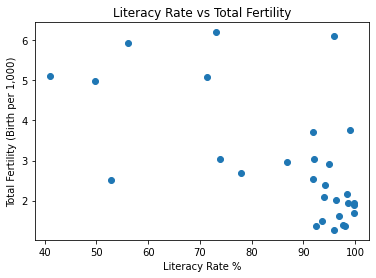

In [9]:
# Scatter Plot:

# Use Matplotlib to create scatter plot and format
plt.scatter(correlation_df["Literacy Rate"],
           correlation_df["Total Fertility"], marker="o")
# Create a unique plot title
plt.title('Literacy Rate vs Total Fertility')
# Create a lable for the y axis
plt.ylabel("Total Fertility (Birth per 1,000)")
# Create a lable for the x axis
plt.xlabel("Literacy Rate %")
# Save a png image of the scatter plot to local folder
plt.savefig('literacy_rates_vs_total_fertility')
# Print scatter plot to screen
plt.show()

#### Scatter Plot Observation:
This is a scatter plot that shows the correlation between the total fertility of births per thousand and the overall literacy rate.  It looks like there is some correlation between the two as the fertility datapoints decrease as the literacty rate increases.  We might be able to get more data points to confirm this.

In [10]:
# Linear Regression Passthrough:

# Use Python define function (def) to start a linear regression function 
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
    print(f"Intercept: {intercept}")
    literacy_rate_opt = (2.1-intercept)/slope
    print(f"Literacy Rate: {literacy_rate_opt}")
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=20,color="black")
    plt.hlines(y=2.1,color="gray",xmin=40, xmax=100)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

The r-squared is: -0.618141880422221
Intercept: 7.7532731299878215
Literacy Rate: 101.36741743356944


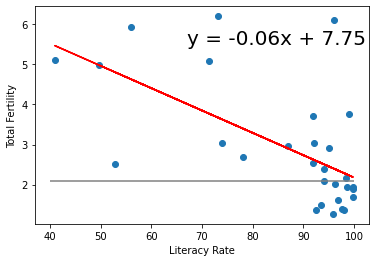

In [11]:
xlbl = "Literacy Rate Percentage"
ylbl = "Total Fertility per 1000"
lblpos = (67,5.5)
plotLinearRegression(correlation_df[xlbl],correlation_df[ylbl],xlbl,ylbl,lblpos)

#### Linear Regression Observation:
This linear regression line shows that there is a strong correlation between the fertility rate and literacy rates.  It might be helpful to compare other factors to the fertility rate such as age, country and income to see how they compare.

In [ ]:
# add 2.1 line

In [ ]:
# create df that are greater than 2.1 fertilty rates in one group and less than or equal to 2.1 fertality rates

